In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
C:\Users\jalex\anaconda3\envs\mlenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
char_data = pd.read_csv(
    Path("charlotte_laborforce2.csv"), index_col="Month", infer_datetime_format=True, parse_dates=True
)
char_data.head()

,Series ID,Year,Period,Label,Value
Month,,,,,
2010-01-01,LAUMT371674000000006,2010,M01,2010 Jan,1132725
2010-02-01,LAUMT371674000000006,2010,M02,2010 Feb,1137650
2010-03-01,LAUMT371674000000006,2010,M03,2010 Mar,1149943
2010-04-01,LAUMT371674000000006,2010,M04,2010 Apr,1153615
2010-05-01,LAUMT371674000000006,2010,M05,2010 May,1156752


In [3]:
char_labor = char_data[['Value']]

char_labor.head()

,Value
Month,
2010-01-01,1132725
2010-02-01,1137650
2010-03-01,1149943
2010-04-01,1153615
2010-05-01,1156752


In [4]:
char_case_shiller = pd.read_csv(
    Path("char_shiller.csv"), index_col="DATE", infer_datetime_format=True, parse_dates=True
)
char_case_shiller.head()

,CRXRNSA
DATE,
1987-01-01,63.388189
1987-02-01,63.936295
1987-03-01,64.171042
1987-04-01,64.813123
1987-05-01,65.181595


In [5]:
char_df = pd.merge(char_labor,char_case_shiller, left_index = True, right_index = True)

char_df.columns = ['char_labor_force','char_case_shiller']

In [6]:
char_df.head()

,char_labor_force,char_case_shiller
2010-01-01,1132725,117.15905
2010-02-01,1137650,115.98348
2010-03-01,1149943,114.76640
2010-04-01,1153615,116.04847
2010-05-01,1156752,116.39244


In [7]:
char_unemployment = pd.read_csv(
    Path("charlotte_unemployment.csv"), index_col="Month", infer_datetime_format=True, parse_dates=True
)
char_unemployment.head()

,Series ID,Year,Period,Label,Value
Month,,,,,
2010-01-01,LAUMT371674000000003,2010,M01,2010 Jan,12.8
2010-02-01,LAUMT371674000000003,2010,M02,2010 Feb,12.8
2010-03-01,LAUMT371674000000003,2010,M03,2010 Mar,12.5
2010-04-01,LAUMT371674000000003,2010,M04,2010 Apr,11.7
2010-05-01,LAUMT371674000000003,2010,M05,2010 May,11.7


In [8]:
char_unemployment = char_unemployment[["Value"]] 

In [9]:
char_unemployment.columns = ["char_unemployment"]

In [10]:
char_df = pd.merge(char_df, char_unemployment, left_index = True, right_index = True)

In [11]:
char_df.head()

,char_labor_force,char_case_shiller,char_unemployment
2010-01-01,1132725,117.15905,12.8
2010-02-01,1137650,115.98348,12.8
2010-03-01,1149943,114.76640,12.5
2010-04-01,1153615,116.04847,11.7
2010-05-01,1156752,116.39244,11.7


In [12]:
char_df['char_labor_force_pct'] = char_df['char_labor_force'].pct_change()

In [13]:
char_df['char_case_shiller_pct'] = char_df['char_case_shiller'].pct_change()

In [14]:
#bring in data sets from team

In [15]:
hr_wage_char = pd.read_csv(
    Path("hr_wage_char.csv"), index_col="DATE", infer_datetime_format=True, parse_dates=True
)
hr_wage_char.head()

,SMU37167400500000003SA
DATE,
2007-01-01,21.990794
2007-02-01,22.131067
2007-03-01,22.117647
2007-04-01,22.228276
2007-05-01,21.688769


In [16]:
hr_wage_char.columns = ['hr_wage_char']

In [17]:
char_df = pd.merge(char_df, hr_wage_char, left_index = True, right_index = True)

In [18]:
sfr_perm_char = pd.read_csv(
    Path("sfr_perm_char.csv"), index_col="DATE", infer_datetime_format=True, parse_dates=True
)


In [19]:
sfr_perm_char.columns = ['sfr_perm_char.csv']

In [20]:
char_df = pd.merge(char_df, sfr_perm_char, left_index = True, right_index = True)

In [21]:
char_df

,char_labor_force,char_case_shiller,char_unemployment,char_labor_force_pct,char_case_shiller_pct,hr_wage_char,sfr_perm_char.csv
2010-01-01,1132725,117.159050,12.8,NaN,NaN,23.486589,552.083277
2010-02-01,1137650,115.983480,12.8,0.004348,-0.010034,23.511166,450.836410
2010-03-01,1149943,114.766400,12.5,0.010806,-0.010494,23.154936,541.274625
2010-04-01,1153615,116.048470,11.7,0.003193,0.011171,23.231898,427.526635
2010-05-01,1156752,116.392440,11.7,0.002719,0.002964,23.329760,348.440790
2010-06-01,1149217,117.241720,11.7,-0.006514,0.007297,23.179569,366.823457
2010-07-01,1145001,117.032250,11.7,-0.003669,-0.001787,23.306624,293.720023
2010-08-01,1143870,116.568780,11.4,-0.000988,-0.003960,23.166928,315.674939
2010-09-01,1138611,115.395740,10.7,-0.004598,-0.010063,22.956223,291.478128
2010-10-01,1148983,114.115010,10.6,0.009109,-0.011099,23.063688,264.806630


In [22]:
monthly_econindex_char = pd.read_csv(
    Path("Monthly_Char_Econ_Index.csv"), index_col="Date", infer_datetime_format=True, parse_dates=True
)

In [23]:
monthly_econindex_char.columns = ["monthly_econindex_char"]

In [24]:
char_df = pd.merge(char_df, monthly_econindex_char, left_index = True, right_index = True)

In [25]:
weekly_char_earnings = pd.read_csv(
    Path("Monthly_Char_Weekly_Earnings.csv"), index_col="Date", infer_datetime_format=True, parse_dates=True
)

In [26]:
weekly_char_earnings.columns = ["weekly_char_earnings"]

In [27]:
char_df = pd.merge(char_df, weekly_char_earnings, left_index = True, right_index = True)

In [28]:
monthly_char_weekly_hours = pd.read_csv(
    Path('Monthly_Char_Weekly_Hours.csv'), index_col="Date", infer_datetime_format=True, parse_dates=True
)

In [29]:
char_df = pd.merge(char_df, monthly_char_weekly_hours, left_index = True, right_index = True)

In [30]:
char_df

,char_labor_force,char_case_shiller,char_unemployment,char_labor_force_pct,char_case_shiller_pct,hr_wage_char,sfr_perm_char.csv,monthly_econindex_char,weekly_char_earnings,Weekly_Hours
2010-01-01,1132725,117.159050,12.8,NaN,NaN,23.486589,552.083277,0.24,802.03,34.1
2010-02-01,1137650,115.983480,12.8,0.004348,-0.010034,23.511166,450.836410,1.06,816.62,34.5
2010-03-01,1149943,114.766400,12.5,0.010806,-0.010494,23.154936,541.274625,2.78,798.68,34.5
2010-04-01,1153615,116.048470,11.7,0.003193,0.011171,23.231898,427.526635,4.13,811.63,34.7
2010-05-01,1156752,116.392440,11.7,0.002719,0.002964,23.329760,348.440790,3.89,815.72,35.1
2010-06-01,1149217,117.241720,11.7,-0.006514,0.007297,23.179569,366.823457,3.73,804.23,34.8
2010-07-01,1145001,117.032250,11.7,-0.003669,-0.001787,23.306624,293.720023,3.26,809.45,34.8
2010-08-01,1143870,116.568780,11.4,-0.000988,-0.003960,23.166928,315.674939,2.93,815.94,35.2
2010-09-01,1138611,115.395740,10.7,-0.004598,-0.010063,22.956223,291.478128,3.16,793.94,34.7
2010-10-01,1148983,114.115010,10.6,0.009109,-0.011099,23.063688,264.806630,3.42,801.68,35.1


In [31]:
# end of bringing in other data sets from the team

In [32]:
char_df.head(20)

,char_labor_force,char_case_shiller,char_unemployment,char_labor_force_pct,char_case_shiller_pct,hr_wage_char,sfr_perm_char.csv,monthly_econindex_char,weekly_char_earnings,Weekly_Hours
2010-01-01,1132725,117.15905,12.8,NaN,NaN,23.486589,552.083277,0.24,802.03,34.1
2010-02-01,1137650,115.98348,12.8,0.004348,-0.010034,23.511166,450.836410,1.06,816.62,34.5
2010-03-01,1149943,114.76640,12.5,0.010806,-0.010494,23.154936,541.274625,2.78,798.68,34.5
2010-04-01,1153615,116.04847,11.7,0.003193,0.011171,23.231898,427.526635,4.13,811.63,34.7
2010-05-01,1156752,116.39244,11.7,0.002719,0.002964,23.329760,348.440790,3.89,815.72,35.1
2010-06-01,1149217,117.24172,11.7,-0.006514,0.007297,23.179569,366.823457,3.73,804.23,34.8
2010-07-01,1145001,117.03225,11.7,-0.003669,-0.001787,23.306624,293.720023,3.26,809.45,34.8
2010-08-01,1143870,116.56878,11.4,-0.000988,-0.003960,23.166928,315.674939,2.93,815.94,35.2
2010-09-01,1138611,115.39574,10.7,-0.004598,-0.010063,22.956223,291.478128,3.16,793.94,34.7
2010-10-01,1148983,114.11501,10.6,0.009109,-0.011099,23.063688,264.806630,3.42,801.68,35.1


In [33]:
char_df.head()
#df['pandas_SMA_3'] = df.iloc[:,1].rolling(window=3).mean()

,char_labor_force,char_case_shiller,char_unemployment,char_labor_force_pct,char_case_shiller_pct,hr_wage_char,sfr_perm_char.csv,monthly_econindex_char,weekly_char_earnings,Weekly_Hours
2010-01-01,1132725,117.15905,12.8,NaN,NaN,23.486589,552.083277,0.24,802.03,34.1
2010-02-01,1137650,115.98348,12.8,0.004348,-0.010034,23.511166,450.836410,1.06,816.62,34.5
2010-03-01,1149943,114.76640,12.5,0.010806,-0.010494,23.154936,541.274625,2.78,798.68,34.5
2010-04-01,1153615,116.04847,11.7,0.003193,0.011171,23.231898,427.526635,4.13,811.63,34.7
2010-05-01,1156752,116.39244,11.7,0.002719,0.002964,23.329760,348.440790,3.89,815.72,35.1


In [34]:
char_df_3M = char_df.copy()

char_df_6M = char_df.copy()

char_df_24M = char_df.copy()


In [35]:
char_df["case_shifted"] = char_df["char_case_shiller_pct"].shift(-12)

In [36]:
# another idea is to predict the price level in a year based on the features in a given month, 
# could make this rolling features if we want
# experiment with different lags

char_df["case_shifted_actual"] = char_df["char_case_shiller"].shift(-12)

In [37]:
char_df.head(10)

,char_labor_force,char_case_shiller,char_unemployment,char_labor_force_pct,char_case_shiller_pct,hr_wage_char,sfr_perm_char.csv,monthly_econindex_char,weekly_char_earnings,Weekly_Hours,case_shifted,case_shifted_actual
2010-01-01,1132725,117.15905,12.8,NaN,NaN,23.486589,552.083277,0.24,802.03,34.1,-0.009726,111.31887
2010-02-01,1137650,115.98348,12.8,0.004348,-0.010034,23.511166,450.836410,1.06,816.62,34.5,-0.010828,110.11348
2010-03-01,1149943,114.76640,12.5,0.010806,-0.010494,23.154936,541.274625,2.78,798.68,34.5,-0.010841,108.91972
2010-04-01,1153615,116.04847,11.7,0.003193,0.011171,23.231898,427.526635,4.13,811.63,34.7,0.013159,110.35298
2010-05-01,1156752,116.39244,11.7,0.002719,0.002964,23.329760,348.440790,3.89,815.72,35.1,0.013530,111.84603
2010-06-01,1149217,117.24172,11.7,-0.006514,0.007297,23.179569,366.823457,3.73,804.23,34.8,0.015283,113.55537
2010-07-01,1145001,117.03225,11.7,-0.003669,-0.001787,23.306624,293.720023,3.26,809.45,34.8,0.000049,113.56096
2010-08-01,1143870,116.56878,11.4,-0.000988,-0.003960,23.166928,315.674939,2.93,815.94,35.2,-0.001365,113.40597
2010-09-01,1138611,115.39574,10.7,-0.004598,-0.010063,22.956223,291.478128,3.16,793.94,34.7,-0.004923,112.84772
2010-10-01,1148983,114.11501,10.6,0.009109,-0.011099,23.063688,264.806630,3.42,801.68,35.1,-0.010306,111.68473


In [38]:
char_df['char_unemployment_pct'] = char_df['char_unemployment'].pct_change()

In [39]:
char_df.dropna(inplace = True)

In [40]:
char_df.head(15)

,char_labor_force,char_case_shiller,char_unemployment,char_labor_force_pct,char_case_shiller_pct,hr_wage_char,sfr_perm_char.csv,monthly_econindex_char,weekly_char_earnings,Weekly_Hours,case_shifted,case_shifted_actual,char_unemployment_pct
2010-02-01,1137650,115.98348,12.8,0.004348,-0.010034,23.511166,450.836410,1.06,816.62,34.5,-0.010828,110.11348,0.000000
2010-03-01,1149943,114.76640,12.5,0.010806,-0.010494,23.154936,541.274625,2.78,798.68,34.5,-0.010841,108.91972,-0.023438
2010-04-01,1153615,116.04847,11.7,0.003193,0.011171,23.231898,427.526635,4.13,811.63,34.7,0.013159,110.35298,-0.064000
2010-05-01,1156752,116.39244,11.7,0.002719,0.002964,23.329760,348.440790,3.89,815.72,35.1,0.013530,111.84603,0.000000
2010-06-01,1149217,117.24172,11.7,-0.006514,0.007297,23.179569,366.823457,3.73,804.23,34.8,0.015283,113.55537,0.000000
2010-07-01,1145001,117.03225,11.7,-0.003669,-0.001787,23.306624,293.720023,3.26,809.45,34.8,0.000049,113.56096,0.000000
2010-08-01,1143870,116.56878,11.4,-0.000988,-0.003960,23.166928,315.674939,2.93,815.94,35.2,-0.001365,113.40597,-0.025641
2010-09-01,1138611,115.39574,10.7,-0.004598,-0.010063,22.956223,291.478128,3.16,793.94,34.7,-0.004923,112.84772,-0.061404
2010-10-01,1148983,114.11501,10.6,0.009109,-0.011099,23.063688,264.806630,3.42,801.68,35.1,-0.010306,111.68473,-0.009346
2010-11-01,1150679,113.45058,11.1,0.001476,-0.005822,22.760796,303.857970,2.63,799.05,35.0,-0.013694,110.15532,0.047170


In [41]:
char_df.to_csv(Path("charlotte_laborforce.csv"))

In [42]:
# https://machinelearningmastery.com/develop-first-xgboost-model-python-scikit-learn/
# XGBoost

In [43]:
char_df.columns

Index(['char_labor_force', 'char_case_shiller', 'char_unemployment',
       'char_labor_force_pct', 'char_case_shiller_pct', 'hr_wage_char',
       'sfr_perm_char.csv', 'monthly_econindex_char', 'weekly_char_earnings',
       'Weekly_Hours', 'case_shifted', 'case_shifted_actual',
       'char_unemployment_pct'],
      dtype='object')

In [44]:
X = char_df[["char_unemployment","char_labor_force","hr_wage_char","sfr_perm_char.csv","monthly_econindex_char","weekly_char_earnings","Weekly_Hours"]]

y = char_df[['case_shifted_actual']]

In [45]:
# # Manually splitting the data
split = int(0.7 * len(X))

X_train = X[: split]
X_test = X[split:]

y_train = y[: split]
y_test = y[split:]

In [46]:
# # Use the MinMaxScaler to scale data between 0 and 1.
# # percentage do not use min max, can scale the nominal number
# # percentages then use standard scaler
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# scaler.fit(X)
# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)
# scaler.fit(y)
# y_train = scaler.transform(y_train)
# y_test = scaler.transform(y_test)

In [47]:
# X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
# X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
# print (f"X_train sample values:\n{X_train[:5]} \n")
# print (f"X_test sample values:\n{X_test[:5]}")

In [48]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense, Dropout

In [49]:
# # Define the LSTM RNN model.
# # comment out drop out layers, when ready uncomment and run
# # square the number of rows for initial numnber of units, 1000x, 2 to the power of x = 1,000,0000
# # maybe add more layers
# model = Sequential()

# number_units = 10
# dropout_fraction = 0.2

# # Layer 1
# model.add(LSTM(
#     units=number_units,
#     return_sequences=True,
#     input_shape=(X_train.shape[1], 1))
#     )
# model.add(Dropout(dropout_fraction))
# # Layer 2
# model.add(LSTM(units=number_units, return_sequences=True))
# model.add(Dropout(dropout_fraction))
# # Layer 3
# model.add(LSTM(units=number_units))
# model.add(Dropout(dropout_fraction))

# # Output layer
# model.add(Dense(1))

In [50]:
# # Compile the model
# model.compile(optimizer="adam", loss="mean_squared_error")

In [51]:
# model.summary()

In [52]:
# # general rule, # of columns, like 5
# model.fit(X_train, y_train, epochs=5, shuffle=False, batch_size=1, verbose=1)

In [53]:
# use sklearn, pass result from prediction into the rquared
#sklearn.metrics, r squared -> add in the two parameters, 

# model.evaluate(X_test, y_test)

In [54]:
# Make some predictions
# predicted = model.predict(X_test)

In [55]:
# Recover the original prices instead of the scaled version
# predicted_prices = scaler.inverse_transform(predicted)
# real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

In [56]:
# Create a DataFrame of Real and Predicted values
# compare = pd.DataFrame({
#     "Real": real_prices.ravel(),
#     "Predicted": predicted_prices.ravel()
#     }, index = char_df.index[-len(real_prices): ])
# compare.head(10)

In [57]:
# Plot the real vs predicted prices as a line chart
# compare.plot()

In [58]:
X = char_df[["char_unemployment","char_labor_force","hr_wage_char","sfr_perm_char.csv","monthly_econindex_char","weekly_char_earnings","Weekly_Hours"]]

y = char_df[['case_shifted_actual']]

In [59]:
# # Manually splitting the data
split = int(0.7 * len(X))

X_train = X[: split]
X_test = X[split:]

y_train = y[: split]
y_test = y[split:]

In [60]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [61]:
X_scaler = scaler.fit(X_train)

X_train = X_scaler.transform(X_train)

X_test = X_scaler.transform(X_test)

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import TweedieRegressor
from sklearn import linear_model
from sklearn.linear_model import TweedieRegressor

In [63]:
# Create and fit model to the data, make predictions
model = linear_model.TweedieRegressor()
model.fit(X_train, y_train)
predictions = model.predict(X_test)



C:\Users\jalex\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [64]:
y_test.head()

,case_shifted_actual
2016-04-01,146.919569
2016-05-01,148.157734
2016-06-01,149.246832
2016-07-01,149.638815
2016-08-01,150.409942


In [65]:
out_of_sample_results = y_test

In [66]:
out_of_sample_results["Out-of-Sample Predictions"] = model.predict(X_test)

C:\Users\jalex\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [67]:
out_of_sample_results.head(25)

,case_shifted_actual,Out-of-Sample Predictions
2016-04-01,146.919569,141.415435
2016-05-01,148.157734,142.419681
2016-06-01,149.246832,145.315620
2016-07-01,149.638815,141.409845
2016-08-01,150.409942,143.734686
2016-09-01,150.717594,145.184853
2016-10-01,151.481491,145.948992
2016-11-01,151.044890,146.866156
2016-12-01,151.297383,145.674181
2017-01-01,151.864043,147.394191


In [68]:
#out of sample performance

out_of_sample_mse = mean_squared_error(
    out_of_sample_results["case_shifted_actual"],
    out_of_sample_results["Out-of-Sample Predictions"]
)

# Using that mean-squared-error, calculate the root-mean-squared error (RMSE):
# YOUR CODE HERE!

out_of_sample_rmse = np.sqrt(out_of_sample_mse)
r2 = r2_score(out_of_sample_results["case_shifted_actual"], out_of_sample_results["Out-of-Sample Predictions"])
print(f"Out-of-sample Root Mean Squared Error (RMSE): {out_of_sample_rmse}")
print(f"Out-of-Sample r2: {r2}")

Out-of-sample Root Mean Squared Error (RMSE): 7.858632487659464
Out-of-Sample r2: -0.684769014187866


In [69]:
#In sample performance

in_sample_results = y_train

# Add a column of "in-sample" predictions to that dataframe:  
# YOUR CODE HERE!

in_sample_results["in-sample predictions"] = model.predict(X_train)


# Calculate in-sample mean_squared_error (for comparison to out-of-sample)
# YOUR CODE HERE!

in_sample_mse = mean_squared_error(
    in_sample_results["case_shifted_actual"],
    in_sample_results["in-sample predictions"]
)

# Calculate in-sample root mean_squared_error (for comparison to out-of-sample)
# YOUR CODE HERE!

in_sample_rmse = np.sqrt(in_sample_mse)
r2_in = r2_score(in_sample_results["case_shifted_actual"], in_sample_results["in-sample predictions"])
print(f"In Sample Root Mean Squared Error (RMSE): {in_sample_rmse}")
print(f"In sample r2: {r2_in}")

In Sample Root Mean Squared Error (RMSE): 3.3095914538519247
In sample r2: 0.909043397514011


C:\Users\jalex\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [70]:
out_of_sample_results = char_df = pd.merge(out_of_sample_results, char_df["char_case_shiller"], left_index = True, right_index = True) 

out_of_sample_results.head(14)

,case_shifted_actual,Out-of-Sample Predictions,char_case_shiller
2016-04-01,146.919569,141.415435,138.800791
2016-05-01,148.157734,142.419681,139.922652
2016-06-01,149.246832,145.315620,141.016066
2016-07-01,149.638815,141.409845,141.356664
2016-08-01,150.409942,143.734686,141.832313
2016-09-01,150.717594,145.184853,142.094661
2016-10-01,151.481491,145.948992,142.357492
2016-11-01,151.044890,146.866156,142.758955
2016-12-01,151.297383,145.674181,142.827416
2017-01-01,151.864043,147.394191,143.313819


In [71]:
# pca analysis
# consider windows, trailing 3 months
# windows possibly with lstm
# random forest, feature importance


# also look at 6 months and 3 months, which out of sample more accurate
# mape, other metric for forecasting (at different offsets), 
# compare out of sample accuracies across MSAs
# XG boost linear regressor, can take a while to train


# insights on the nature of case shiller
# cross msa comparisons

In [72]:
# char_df_3M = char_df

char_df_3M["case_shifted"] = char_df_3M["char_case_shiller"].shift(-3)

char_df_3M.dropna(inplace = True)

# char_df_6M = char_df

char_df_6M["case_shifted"] = char_df_6M["char_case_shiller"].shift(-6)

char_df_6M.dropna(inplace = True)


# char_df_24M = char_df

char_df_24M["case_shifted"] = char_df_24M["char_case_shiller"].shift(-24)

char_df_24M.dropna(inplace = True)




In [73]:
#3M Model

X = char_df_3M[["char_unemployment","char_labor_force","hr_wage_char","sfr_perm_char.csv","monthly_econindex_char","weekly_char_earnings","Weekly_Hours"]]

y = char_df_3M[["case_shifted"]]

split = int(0.7 * len(X))

X_train = X[: split]
X_test = X[split:]

y_train = y[: split]
y_test = y[split:]


X_scaler = scaler.fit(X_train)

X_train = X_scaler.transform(X_train)

X_test = X_scaler.transform(X_test)

model = linear_model.TweedieRegressor()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

out_of_sample_results = y_test

out_of_sample_results["Out-of-Sample Predictions"] = model.predict(X_test)


#out of sample performance

out_of_sample_mse = mean_squared_error(
    out_of_sample_results["case_shifted"],
    out_of_sample_results["Out-of-Sample Predictions"]
)

# Using that mean-squared-error, calculate the root-mean-squared error (RMSE):
# YOUR CODE HERE!

out_of_sample_rmse = np.sqrt(out_of_sample_mse)
r2 = r2_score(out_of_sample_results["case_shifted"], out_of_sample_results["Out-of-Sample Predictions"])
print(f"Out-of-sample Root Mean Squared Error (RMSE): {out_of_sample_rmse}")
print(f"Out-of-Sample r2: {r2}")

#In sample performance

in_sample_results = y_train

# Add a column of "in-sample" predictions to that dataframe:  
# YOUR CODE HERE!

in_sample_results["in-sample predictions"] = model.predict(X_train)


# Calculate in-sample mean_squared_error (for comparison to out-of-sample)
# YOUR CODE HERE!

in_sample_mse = mean_squared_error(
    in_sample_results["case_shifted"],
    in_sample_results["in-sample predictions"]
)

# Calculate in-sample root mean_squared_error (for comparison to out-of-sample)
# YOUR CODE HERE!

in_sample_rmse = np.sqrt(in_sample_mse)
r2_in = r2_score(in_sample_results["case_shifted"], in_sample_results["in-sample predictions"])
print(f"In Sample Root Mean Squared Error (RMSE): {in_sample_rmse}")
print(f"In sample r2: {r2_in}")

Out-of-sample Root Mean Squared Error (RMSE): 12.667983544004182
Out-of-Sample r2: -2.701219601180342
In Sample Root Mean Squared Error (RMSE): 3.8499785692267063
In sample r2: 0.8662867639946233


C:\Users\jalex\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\jalex\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\jalex\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [74]:
out_of_sample_results = pd.merge(out_of_sample_results, char_df_3M["char_case_shiller"], left_index = True, right_index = True) 

out_of_sample_results.head(14)

,case_shifted,Out-of-Sample Predictions,char_case_shiller
2016-11-01,143.893318,140.310138,142.758955
2016-12-01,145.642926,139.898806,142.827416
2017-01-01,146.919569,141.671175,143.313819
2017-02-01,148.157734,140.254072,143.893318
2017-03-01,149.246832,143.099428,145.642926
2017-04-01,149.638815,141.616123,146.919569
2017-05-01,150.409942,143.016355,148.157734
2017-06-01,150.717594,142.493433,149.246832
2017-07-01,151.481491,143.108179,149.638815
2017-08-01,151.044890,142.641533,150.409942


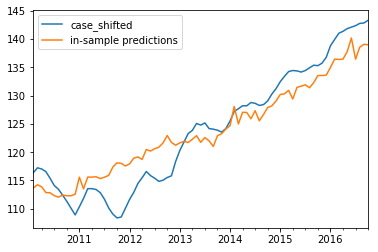

In [75]:
in_sample_results.plot()

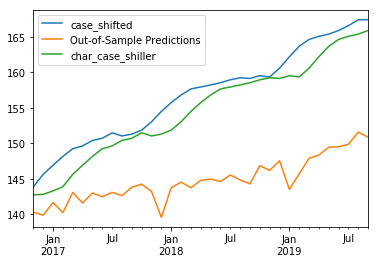

In [76]:
out_of_sample_results.plot()

In [77]:
#6M Model

X = char_df_6M[["char_unemployment","char_labor_force","hr_wage_char","sfr_perm_char.csv","monthly_econindex_char","weekly_char_earnings","Weekly_Hours"]]

y = char_df_6M[["case_shifted"]]

split = int(0.7 * len(X))

X_train = X[: split]
X_test = X[split:]

y_train = y[: split]
y_test = y[split:]


X_scaler = scaler.fit(X_train)

X_train = X_scaler.transform(X_train)

X_test = X_scaler.transform(X_test)

model = linear_model.TweedieRegressor()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

out_of_sample_results = y_test

out_of_sample_results["Out-of-Sample Predictions"] = model.predict(X_test)


#out of sample performance

out_of_sample_mse = mean_squared_error(
    out_of_sample_results["case_shifted"],
    out_of_sample_results["Out-of-Sample Predictions"]
)

# Using that mean-squared-error, calculate the root-mean-squared error (RMSE):
# YOUR CODE HERE!

out_of_sample_rmse = np.sqrt(out_of_sample_mse)
r2 = r2_score(out_of_sample_results["case_shifted"], out_of_sample_results["Out-of-Sample Predictions"])
print(f"Out-of-sample Root Mean Squared Error (RMSE): {out_of_sample_rmse}")
print(f"Out-of-Sample r2: {r2}")

#In sample performance

in_sample_results = y_train

# Add a column of "in-sample" predictions to that dataframe:  
# YOUR CODE HERE!

in_sample_results["in-sample predictions"] = model.predict(X_train)


# Calculate in-sample mean_squared_error (for comparison to out-of-sample)
# YOUR CODE HERE!

in_sample_mse = mean_squared_error(
    in_sample_results["case_shifted"],
    in_sample_results["in-sample predictions"]
)

# Calculate in-sample root mean_squared_error (for comparison to out-of-sample)
# YOUR CODE HERE!

in_sample_rmse = np.sqrt(in_sample_mse)
r2_in = r2_score(in_sample_results["case_shifted"], in_sample_results["in-sample predictions"])
print(f"In Sample Root Mean Squared Error (RMSE): {in_sample_rmse}")
print(f"In sample r2: {r2_in}")

Out-of-sample Root Mean Squared Error (RMSE): 11.309453671768726
Out-of-Sample r2: -2.229794159286659
In Sample Root Mean Squared Error (RMSE): 3.5813374212879596
In sample r2: 0.8901020174936185


C:\Users\jalex\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\jalex\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\jalex\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [78]:
#24M Model

X = char_df_24M[["char_unemployment","char_labor_force","hr_wage_char","sfr_perm_char.csv","monthly_econindex_char","weekly_char_earnings","Weekly_Hours"]]

y = char_df_24M[["case_shifted"]]

split = int(0.7 * len(X))

X_train = X[: split]
X_test = X[split:]

y_train = y[: split]
y_test = y[split:]


X_scaler = scaler.fit(X_train)

X_train = X_scaler.transform(X_train)

X_test = X_scaler.transform(X_test)

model = linear_model.TweedieRegressor()

model.fit(X_train, y_train)
predictions = model.predict(X_test)

out_of_sample_results = y_test

out_of_sample_results["Out-of-Sample Predictions"] = model.predict(X_test)


#out of sample performance

out_of_sample_mse = mean_squared_error(
    out_of_sample_results["case_shifted"],
    out_of_sample_results["Out-of-Sample Predictions"]
)

# Using that mean-squared-error, calculate the root-mean-squared error (RMSE):
# YOUR CODE HERE!

out_of_sample_rmse = np.sqrt(out_of_sample_mse)
r2 = r2_score(out_of_sample_results["case_shifted"], out_of_sample_results["Out-of-Sample Predictions"])
print(f"Out-of-sample Root Mean Squared Error (RMSE): {out_of_sample_rmse}")
print(f"Out-of-Sample r2: {r2}")

#In sample performance

in_sample_results = y_train

# Add a column of "in-sample" predictions to that dataframe:  
# YOUR CODE HERE!

in_sample_results["in-sample predictions"] = model.predict(X_train)


# Calculate in-sample mean_squared_error (for comparison to out-of-sample)
# YOUR CODE HERE!

in_sample_mse = mean_squared_error(
    in_sample_results["case_shifted"],
    in_sample_results["in-sample predictions"]
)

# Calculate in-sample root mean_squared_error (for comparison to out-of-sample)
# YOUR CODE HERE!

in_sample_rmse = np.sqrt(in_sample_mse)
r2_in = r2_score(in_sample_results["case_shifted"], in_sample_results["in-sample predictions"])
print(f"In Sample Root Mean Squared Error (RMSE): {in_sample_rmse}")
print(f"In sample r2: {r2_in}")


C:\Users\jalex\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\jalex\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Out-of-sample Root Mean Squared Error (RMSE): 6.655752410193006
Out-of-Sample r2: -0.5392036369368907
In Sample Root Mean Squared Error (RMSE): 3.193327975912036
In sample r2: 0.9103759377666308


C:\Users\jalex\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
